##  Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped. (Note, cv2 reads and saves in BGR channel order)

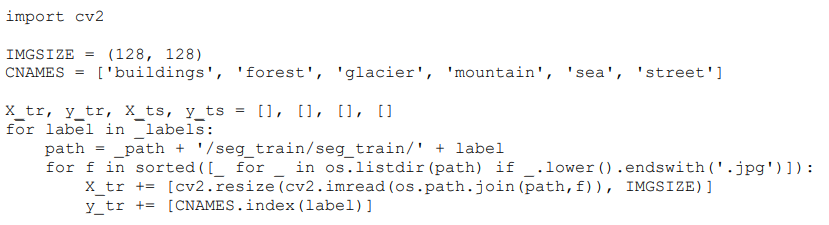

## Display a few images. How many color channels are there?


Dataset Summary: 
-----------------------------------------------
Number of color channels:  3
Number of train classes:  6
Unique train classes:  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of test classes:  6
Unique test classes:  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
-----------------------------------------------
Train set size:  14034
Shape of train tensor batch:  torch.Size([8, 3, 128, 128])
-----------------------------------------------
Shape of test tensor batch:  torch.Size([3000, 3, 128, 128])
Test set size:  3000
-----------------------------------------------
Train set Sample Count Per Class: 
Class:  buildings Count:  2191
Class:  forest Count:  2271
Class:  glacier Count:  2404
Class:  mountain Count:  2512
Class:  sea Count:  2274
Class:  street Count:  2382
-----------------------------------------------
Test set Sample Count Per Class: 
Class:  buildings Count:  437
Class:  forest Count:  474
Class:  glacier Count: 

'\nThere are three channels in each image of the dataset. The channel number can be seen in both\ntrain and test data as shape[1], and is easy to tell since the images appear to be in RGB format\nand not gray scale or any other format.\n'

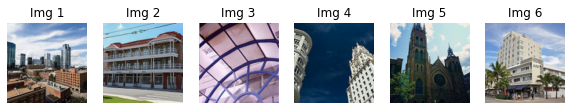

In [1]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import datasets, transforms

##get current working directory
cwd = os.getcwd()

##datapath
datapath = cwd + '\\data\\'

##define transforms to use on input images 
transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                 transforms.Resize((128, 128)),
                                 transforms.ToTensor()])

## define dataset and assign transforms
train_data = datasets.ImageFolder(datapath + '/train', transform=transforms)
test_data = datasets.ImageFolder(datapath + '/test', transform=transforms)

##define dataloaders 
trainloader = torch.utils.data.DataLoader(train_data, batch_size = 8)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 3000)

##define iterator for dataloaders
train_images, train_labels = next(iter(trainloader))
test_images, test_labels = next(iter(testloader))

##dataset summary
def count_samples(datapath: str):
    '''
    Counts samples in each class folder
    
    :param datapath: Path to folders with unique classes
    '''
    for directory in os.listdir(datapath):
        print('Class: ', directory, 'Count: ', len(os.listdir(datapath + directory)))

print('\nDataset Summary: ')
print('-----------------------------------------------')
print('Number of color channels: ', train_images.shape[1])
print('Number of train classes: ', len(os.listdir(datapath + 'train/img/')))
print('Unique train classes: ', os.listdir(datapath + 'train/img/'))
print('Number of test classes: ', len(os.listdir(datapath + 'test/img/')))
print('Unique test classes: ', os.listdir(datapath + 'test/img/'))
print('-----------------------------------------------')
print('Train set size: ', len(train_data.imgs))
print('Shape of train tensor batch: ', train_images.shape)
print('-----------------------------------------------')
print('Shape of test tensor batch: ', test_images.shape)
print('Test set size: ', len(test_data.imgs))
print('-----------------------------------------------')
print('Train set Sample Count Per Class: ')
count_samples(datapath + 'train/img/')
print('-----------------------------------------------')
print('Test set Sample Count Per Class: ')
count_samples(datapath + 'test/img/')
print('-----------------------------------------------')

##visualize the data
fig = plt.figure(figsize=(10, 7))
rows, columns = 1, 6
def show_img(img_num):
    fig.add_subplot(rows, columns, img_num)
    im_num = 'Img ' + str(img_num)
    plt.imshow(np.transpose(train_images[img_num].cpu().detach().numpy(), (1, 2, 0)))
    plt.axis('off')
    plt.title(im_num)
    
for i in range(1, columns + 1):
    show_img(i)

'''
There are three channels in each image of the dataset. The channel number can be seen in both
train and test data as shape[1], and is easy to tell since the images appear to be in RGB format
and not gray scale or any other format.
'''

## Convert the imageset to numpy array, such as the array size:(14034, 128, 128, 3) Scale the imageset to [0-1].


In [2]:
def normalize_batch(tensor: torch.tensor) -> torch.tensor:
    '''
    Converts to numpy array for min/max normalization [0, 1]
    
    :param tensor: train or test tensor
    
    Return: tensor batch normalized in range [0, 1]
    '''
    train_array = tensor.numpy()[:, ::-1, :, :]
#     train_array = train_array.reshape(-1, 128, 128, 3) ##uncomment to change shape
    train_array = (train_array - np.min(train_array)) / (np.max(train_array) - np.min(train_array))
    return torch.from_numpy(train_array)

##sanity and proof check of batch normalization function
train_batch = normalize_batch(train_images)
print('\nShape of batch of images: \n\n', train_batch.shape)
print('\nTrain batch values at index [0]: \n\n', train_batch[0])


Shape of batch of images: 

 torch.Size([8, 3, 128, 128])

Train batch values at index [0]: 

 tensor([[[0.9608, 0.9647, 0.9725,  ..., 0.9647, 0.9608, 0.9608],
         [0.9608, 0.9647, 0.9725,  ..., 0.9608, 0.9608, 0.9569],
         [0.9608, 0.9647, 0.9725,  ..., 0.9608, 0.9569, 0.9569],
         ...,
         [0.2235, 0.1529, 0.2275,  ..., 0.2588, 0.2196, 0.1882],
         [0.1882, 0.1451, 0.1373,  ..., 0.2627, 0.1843, 0.2392],
         [0.1922, 0.1451, 0.1137,  ..., 0.2706, 0.2039, 0.2235]],

        [[0.9686, 0.9686, 0.9725,  ..., 0.9725, 0.9686, 0.9686],
         [0.9686, 0.9686, 0.9725,  ..., 0.9686, 0.9686, 0.9647],
         [0.9686, 0.9686, 0.9725,  ..., 0.9686, 0.9647, 0.9647],
         ...,
         [0.2353, 0.1647, 0.2392,  ..., 0.2667, 0.2275, 0.1961],
         [0.2000, 0.1569, 0.1490,  ..., 0.2706, 0.1922, 0.2471],
         [0.2039, 0.1569, 0.1255,  ..., 0.2784, 0.2118, 0.2314]],

        [[0.9686, 0.9686, 0.9725,  ..., 0.9725, 0.9686, 0.9686],
         [0.9686, 0.9686, 0

## Create a neural network to train and report its performance on the testing portion of the dataset. 60% reclassification and 55% testing performance should be achievable without any hyperparameter tuning. (Hint: My model with (50,50,50) layers, which is similar to the model in module notebook, took around 5 minutes to train 200 epochs.)Reminder, you have to convert the 3D image (including the color channel) to a linear vector in case you use fully connected layers at the input, i.e._X = torch.flatten(_X, start_dim=1). (Hint, for debugging use print statements or PyCharm to display tensor shapes)

In [3]:
%%time
'''
The neural network that I decided to go with was a convolutional neural network, because
these neural networks tend to perform well on both time to train and overall performance for 
classification. It was tempting to use the MLP that we created on the last assignment, but after
considering problem 3, 60% accuracy with a train time of five minutes seemed low and long respectively.
CNNs are also well documented and can found in our class book and on Pytorch's website. Pytorch makes
it easy to create a CNN with its torch.nn library.This network is a convolutional neural network
with two convolution layers with maxpooling, and three linear layers. The batch normalization step
can be seen in the first step of the forward propagation prior to the maxpooling of the activation 
of the first convolutional layer.
'''
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    '''
    Convolutional Neural Network
    '''
    def __init__(self):
        super().__init__()
        ##three channel convolutional layer instance 1
        self.convolution1 = nn.Conv2d(3, 6, 5)
        
        ##two dimentional maxpool
        self.max_pool = nn.MaxPool2d(2, 2)
        
        ##convolutional layer 2
        self.convolution2 = nn.Conv2d(6, 16, 5)
        
        ##linear layer 1
        self.fc1 = nn.Linear(13456, 100)
        
        ##linear layer 2
        self.fc2 = nn.Linear(100, 40)
        
        #linear layer 3 with output of the size of number of unique classes
        self.fc3 = nn.Linear(40, 6)

    def forward(self, X):
        '''CNN forward pass
        
        :param X: minibatch of image data
        
        Return: Output
        '''
        ##normalize batch step defined in problem 2
        X = normalize_batch(X)
#         print('Input X Shape: ', x.shape) ## debug

        X = self.max_pool(F.relu(self.convolution1(X)))
#         print('After Conv 1 X Shape: ', x.shape) ## debug

        X = self.max_pool(F.relu(self.convolution2(X)))
#         print('After Conv 2 X Shape: ', x.shape) ## dubug

        ##flatten dimensions as explained in the problem
        X = torch.flatten(X, start_dim=1) 
#         print('After flatten X Shape: ', x.shape)# debug

        X = F.relu(self.fc1(X))
#         print('After activation 1 X Shape: ', x.shape) ##debug

        X = F.relu(self.fc2(X))
#         print('After activation 2 X Shape: ', x.shape) ##debug

        ##return output layer
        return self.fc3(X)

CPU times: total: 0 ns
Wall time: 0 ns


In [4]:
%%time

##hyperparameters
lr = 0.001
momentum = 0.9
epochs = 2
    
##instantiate convolutional neural network
cnn = CNN()

print('\nHyperparameter Summary: ')
print('-----------------------------------------------')
print('Training Epochs: ', epochs)
print('Learning Rate: ', lr)
print('Momentum: ', momentum)

print('\nNetwork Summary: ')
print('-----------------------------------------------\n')
print(cnn)

##optimizer
import torch.optim as optim
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

##loss function
criterion = nn.CrossEntropyLoss()

##save weights path
savepath = './cnn.pth'

##iterate user defined number of iterations
for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
    ##track loss
    batch_loss = 0.0
    
    ##iterate through mini-batches
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        ##zero gradients
        optimizer.zero_grad()

        ##forward pass
        outputs = cnn(inputs)
        
        ##backprop
        net_loss = criterion(outputs, labels)
        net_loss.backward()
        
        ##optimization
        optimizer.step()
        
        ##print batch loss and network loss every 1000 mini-batches
        batch_loss += net_loss.item()
        if i % 1000 == 999:    
            print(f'[{epoch + 1}, {i + 1:6d}] loss: {batch_loss / 1000:.6f}')
            batch_loss = 0.0

print('\nFinished!!')

# ##save network
print('Saving weights to: ', savepath)
torch.save(cnn.state_dict(), savepath)
print('\n')


Hyperparameter Summary: 
-----------------------------------------------
Training Epochs:  2
Learning Rate:  0.001
Momentum:  0.9

Network Summary: 
-----------------------------------------------

CNN(
  (convolution1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (convolution2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=13456, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=6, bias=True)
)


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

[1,   1000] loss: 0.044348


 50%|██████████████████████████████████████████                                          | 1/2 [00:46<00:46, 46.09s/it]

[2,   1000] loss: 0.000037


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:33<00:00, 46.94s/it]


Finished!!
Saving weights to:  ./cnn.pth


CPU times: total: 12min 22s
Wall time: 1min 33s


In [5]:
%%time

##instantiate cnn netork
cnn = CNN()

##load model
loadpath = savepath
print('\nLoading trained weights from: ', savepath)
cnn.load_state_dict(torch.load(loadpath))

##iterate through test set
correct, total = 0, 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        ##forward pass images through network and obtain outputs
        outputs = cnn(images)
        
        ##get energies of each class as array and get index of maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        ##record predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

##calculate accuracy
print('\nTest Performance: ')
print('-----------------------------------------------')
print("Accuracy of model on test set with 3000 sample test set: ", (correct // total) * 100)
print('\n')


Loading trained weights from:  ./cnn.pth

Test Performance: 
-----------------------------------------------
Accuracy of model on test set with 3000 sample test set:  100


CPU times: total: 43.9 s
Wall time: 5.85 s


__Results__:

Training was done with about 14k images for training and 3k images for testing, with a learning rate

of 0.001 seconds, two two epochs, and 0.9 momentum. The cnn did much better then I expected both 

from a runtime and accuracy perpective. Out of the 

300 test samples, the accuracy ended up at 100%. I am not sure whether this is a good thing or not, 

since I am generally leary with such a high score. In order to figure out if this is a correct score

however, more work would need to be done to investigate the network and output. The train time of 1

minute and 38 seconds was also better then I expected, since training was done on cpu. Inference

time was also fast at about 43 seconds for a test set of 3000 images. All-in-all, I would say that 

this was a good outcome.

## Research and find out how to improve the neural network model to solve this problem. Outline an approach.

Some improvements include: 

- Train and inference time improvements: Instead of running on cpu, the model could run on gpu with potentially an 8X improvement of time to train [1].


- Another improvement to performance would include a hyperparameter search on number and size of linear layers to optimize the size of the network for faster training and inferencing.


- K-fold cross validation could also be used to better assess the model's performance by analyzing the error on validation performance. 


- Another approach would using ensemble methods such as a voting classifier. This can be done with Pytorch's ensemble API to improve both model robustness and performance [2].


- A model can also only be as good as the data that it is trained and tested on. With that said, adding more quality data to the train and test set is a great way of increasing model robustness and performance.


- The train set underwent a couple of augmentations, such as randomly horizontally flipping images, and resizing all images to be sure that all input images were the same size. There are many more augmentations that could potentially make the model more robust, such as adding noise, blur, scaling images, or cutmixing images [3].


- Transfer learning could also be used for a problem like this if new data was procured. If the new data was similiar enough, then the model could skip through learning some of the basic features of the dataset and start off with pretrained weights that were trained on a similiar dataset []. 


[1] ResearchGate. https://www.researchgate.net/figure/Comparison-of-CPU-and-GPU-runtimes-vs-the-number-of-points_fig1_224245725 

[2] Ensemble Pytoch API. Pytorch, https://ensemble-pytorch.readthedocs.io/en/latest/

[3] Kalkman, Patrick. Towards Data Science, "Increase the Accuracy of Your CNN by Following These 5 Tips I Learned From the Kaggle Community." https://towardsdatascience.com/increase-the-accuracy-of-your-cnn-by-following-these-5-tips-i-learned-from-the-kaggle-community-27227ad39554

[4] Yalcin, G. Orhan. Towards Data Science. DEEP LEARNING CASE STUDIES4 Pre-Trained CNN Models to Use for Computer Vision with Transfer Learning: Using State-of-the-Art Pre-trained Neural Network Models to Tackle Computer Vision Problems with Transfer Learning. https://towardsdatascience.com/4-pre-trained-cnn-models-to-use-for-computer-vision-with-transfer-learning-885cb1b2dfc
